**IRIS Dataset, Problem is to get Species Outcomes**

In [6]:
import pandas as pd
df =  pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.00000,150.000000
mean,6.273333,3.460000,4.22000,1.773333
std,0.889134,0.551143,1.74506,0.696556
min,5.000000,2.000000,1.00000,1.000000
25%,6.000000,3.000000,2.00000,1.000000
50%,6.000000,3.000000,5.00000,2.000000
75%,7.000000,4.000000,6.00000,2.000000
max,8.000000,5.000000,7.00000,3.000000


In [13]:
import math
import numpy as np

df['sepal_length']  = df['sepal_length'].apply(np.ceil)
df['sepal_width']  = df['sepal_width'].apply(np.ceil)
df['petal_length']  = df['petal_length'].apply(np.ceil)
df['petal_width']  = df['petal_width'].apply(np.ceil)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.0,4.0,2.0,1.0,setosa
1,5.0,3.0,2.0,1.0,setosa
2,5.0,4.0,2.0,1.0,setosa
3,5.0,4.0,2.0,1.0,setosa
4,5.0,4.0,2.0,1.0,setosa


In [14]:
X = df.drop('species',axis='columns')
y = df.species

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Applying Classification**

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [17]:
model.score(X_test, y_test)

1.0

**Checking the Percentage of X_test on y_Predicted**

In [19]:
y_predicted = model.predict(X_test)


 **Confusion Matrix**

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  7]])

Text(69.0, 0.5, 'Truth')

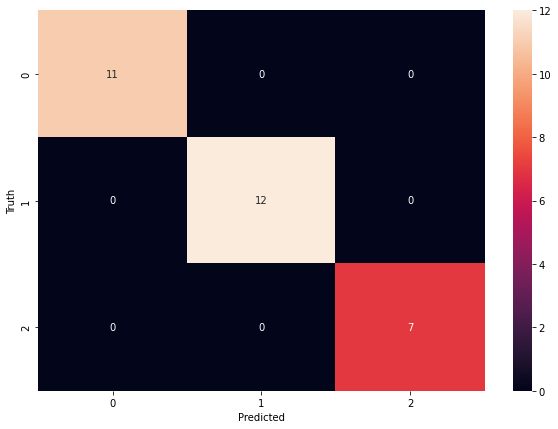

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')